In [2]:
import geemap
import pandas as pd
import numpy as np
import pdb
from IPython.display import display
import ee
import os

In [3]:
#Load from csv:
ulti_log = pd.read_csv('~F:/Iowa BMP/mosaic_elevation.csv') #mosaic_update3 is largest file without elevation

ulti_log

C:\Users\arj26323\AppData\Local\Temp\ipykernel_13024\851023219.py:2: DtypeWarning: Columns (5,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ulti_log = pd.read_csv('~F:/Iowa BMP/mosaic_update3.csv') #mosaic_update3 is largest file without elevation


,index,HUC_12,NRCS_CODE,PRACTICE,Present2_1,CREATOR_NA,Present80s,SHAPE_Area,LAST_EDIT_,Merge,...,G,N,Examined,Shape_Leng,ORIG_FID,Shape_Area,BUFF_DIST,CID,ndvi,ndwi
0,0,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,146,187,NaN,NaN,NaN,NaN,NaN,NaN,0.280822,-0.123123
1,1,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,141,175,NaN,NaN,NaN,NaN,NaN,NaN,0.211073,-0.107595
2,2,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,137,192,NaN,NaN,NaN,NaN,NaN,NaN,0.366548,-0.167173
3,3,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,146,191,NaN,NaN,NaN,NaN,NaN,NaN,0.299320,-0.133531
4,4,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,146,191,NaN,NaN,NaN,NaN,NaN,NaN,0.299320,-0.133531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938514,4995,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,113,154,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.278008,-0.153558
938515,4996,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,121,149,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.201613,-0.103704
938516,4997,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,110,151,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.268908,-0.157088
938517,4998,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,105,136,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.214286,-0.128631


In [4]:
# for col in ulti_log.columns:
#     print(col)

def bmp_classify(row):
    if row['PRACTICE'] == 'Farmland':
        return 'Non_BMP'
    return 'BMP'

def grassed_classify(row):
    if row['PRACTICE'] == 'Grassed Waterway':
        return 'Grassed'
    return 'Not_grassed'

ulti_log['BMP status'] = ulti_log.apply(bmp_classify, axis = 1)
ulti_log['Grassed status'] = ulti_log.apply(grassed_classify, axis = 1)

ulti_log

,index,HUC_12,NRCS_CODE,PRACTICE,Present2_1,CREATOR_NA,Present80s,SHAPE_Area,LAST_EDIT_,Merge,...,Examined,Shape_Leng,ORIG_FID,Shape_Area,BUFF_DIST,CID,ndvi,ndwi,BMP status,Grassed status
0,0,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.280822,-0.123123,BMP,Not_grassed
1,1,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.211073,-0.107595,BMP,Not_grassed
2,2,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.366548,-0.167173,BMP,Not_grassed
3,3,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.299320,-0.133531,BMP,Not_grassed
4,4,1.024000e+11,332.0,Contour Buffer Strips,NaN,II,NaN,84567.254411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.299320,-0.133531,BMP,Not_grassed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938514,4995,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.278008,-0.153558,Non_BMP,Not_grassed
938515,4996,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.201613,-0.103704,Non_BMP,Not_grassed
938516,4997,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.268908,-0.157088,Non_BMP,Not_grassed
938517,4998,NaN,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.066343,100.0,0.00034,1000.0,0.0,0.214286,-0.128631,Non_BMP,Not_grassed


In [5]:
# #Add NDVI and NDWI - until you can get addbands functions to work with extraction
# ulti_log['ndvi'] = (ulti_log['N']-ulti_log['R'])/(ulti_log['N']+ulti_log['R'])
# ulti_log['ndwi'] = (ulti_log['G']-ulti_log['N'])/(ulti_log['G']+ulti_log['N']) #not making use of SWIR

#add other indices?

# Get the labeled training data for each band
red_train = ulti_log['R']
blue_train = ulti_log['B'] ##WHY DOES THIS WORK FOR MOSAIC BUT NOT FOR NON MOSAIC
green_train = ulti_log['G']
nir_train = ulti_log['N']
ndwi_train = ulti_log['ndvi']
ndvi_train = ulti_log['ndwi']

elev_train = ulti_log['elevation']

xargs = np.column_stack((blue_train, green_train, red_train, nir_train, ndvi_train, ndwi_train, elev_train)) 
##ORDER OF XARGS MATTERS

## Get the labeled value
yargs = ulti_log['PRACTICE']
# yargs = ulti_log['BMP status'] #Binary - either BMP or not

seed = 3

# Split to training and test data
from sklearn.model_selection import train_test_split
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=0.2, random_state=seed)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

'''
##LOOK INTO THIS: 
https://scikit-learn.org/stable/modules/generated/sklearn.
model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
'''

class_weights = {'Contour Buffer Strips': 0.12, 'Farmland': 0.28, 'Grassed Waterway': 0.12, 'Pond Dam': 0.12, \
                'Stripcropping': 0.12, 'Terrace': 0.12, 'Water and Sediment Control Basin (WASCOB)': 0.12}  #Adjust as needed

#Random forest classification
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('forest', RandomForestClassifier(n_estimators = 300, min_samples_leaf=10,  class_weight=class_weights, \
                                          random_state=seed)) #also try class_weight = 'balanced'
    ]
)

pipe.fit(xargs_train, yargs_train) #Train
y_pred=pipe.predict(xargs_test) #Fit the testing data

In [46]:
#Model results
print(accuracy_score(yargs_test, y_pred))
print(confusion_matrix(yargs_test, y_pred)) 

0.6449303158163918
[[ 1914  6068   859     6    42   139    17]
 [  167 96784  2456     3    87   299    49]
 [  188 24975 18124     4    78   749    57]
 [   19  1857   659    55    13   162     4]
 [   16  2015   389     1   993    40     5]
 [  119 14139  4086     3    44  2892    33]
 [   35  5263  1228     2    14   259   294]]


In [47]:
#Recall, precision, and F1 scores
from sklearn.metrics import classification_report
print(classification_report(yargs_test, y_pred))

                                           precision    recall  f1-score   support

                    Contour Buffer Strips       0.78      0.21      0.33      9045
                                 Farmland       0.64      0.97      0.77     99845
                         Grassed Waterway       0.65      0.41      0.50     44175
                                 Pond Dam       0.74      0.02      0.04      2769
                            Stripcropping       0.78      0.29      0.42      3459
                                  Terrace       0.64      0.14      0.22     21316
Water and Sediment Control Basin (WASCOB)       0.64      0.04      0.08      7095

                                 accuracy                           0.64    187704
                                macro avg       0.70      0.30      0.34    187704
                             weighted avg       0.65      0.64      0.58    187704



In [48]:
##How is this different for classifier (no mse)
## Mean baseline
# print('MEAN BASELINE:')
# y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
# print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

##5-fold cross validation
# predictors = xargs_train
# targets = yargs_train 

# from sklearn.model_selection import KFold, cross_validate

# X, y = predictors, targets
# n_splits = 5
# kf = KFold(n_splits=n_splits, shuffle=True)

# model = pipe
# scoring=('r2', 'neg_root_mean_squared_error')

# cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

# x = pd.DataFrame(cv_results)

# print('r squared is: ' + str(x['test_r2'].mean()))
# print('Average RMSE (5 fold) is: '+ str(-x['test_neg_root_mean_squared_error'].mean()))
# print('NRSME is: ' + str(-x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))

# pipe.steps[1][1].feature_importances_

In [49]:
sum(confusion_matrix(yargs_test, y_pred)) #why are these numbers so #172231 total

array([  2458, 151101,  27801,     74,   1271,   4540,    459],
      dtype=int64)

In [50]:
yargs_test

654469                                     Farmland
511576                                     Farmland
595957                                     Farmland
343025                                      Terrace
221942                             Grassed Waterway
                            ...                    
404073    Water and Sediment Control Basin (WASCOB)
385442                                      Terrace
302145                                      Terrace
539629                                     Farmland
689102                                     Farmland
Name: PRACTICE, Length: 187704, dtype: object

In [51]:
df = ulti_log.groupby('PRACTICE')['imagedate'].count() #'index' not present in farmland extraction

df #i have concerns stripcropping is not getting data from enough locations - also pond dam seems low? see gis file

PRACTICE
Contour Buffer Strips                         45000
Farmland                                     500000
Grassed Waterway                             219692
Pond Dam                                      14122
Stripcropping                                 17320
Terrace                                      107511
Water and Sediment Control Basin (WASCOB)     34874
Name: imagedate, dtype: int64

In [52]:
#Export df to csv, to save time

import os

out_dir = os.path.expanduser('~F:/Iowa BMP/')
out_csv = os.path.join(out_dir, 'mosaic_bands.csv')
# ulti_log.to_csv(out_csv, index = False)

bands: 7
height: 326
width: 332
crs: EPSG:26915


<closed DatasetReader name='F:/Iowa BMP/Geotiffs/IA/Tests/ia_im.tif' mode='r'>

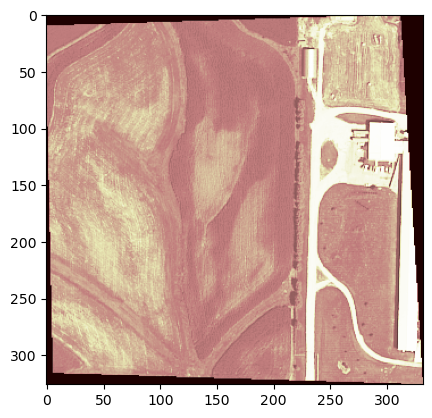

In [53]:
#Rasterio load geotiffs

import rasterio
import gdal

im = rasterio.open("F:/Iowa BMP/Geotiffs/IA/Tests/ia_im.tif")

print('bands: ' + str(im.count))
print('height: ' + str(im.height))
print('width: ' + str(im.width))
print('crs: ' + str(im.crs))

from matplotlib import pyplot as plt
from rasterio.plot import show

plt.imshow(im.read(1), cmap='pink')
# show(im)

input_tiff_path = "F:/Iowa BMP/Geotiffs/IA/Tests/ia_im.tif"
with rasterio.open(input_tiff_path) as src:
    red_band = src.read(1)
    green_band = src.read(2)
    blue_band = src.read(3)
    nir_band = src.read(4)
    
    ndvi_band = src.read(5)
    
    ndwi_band = src.read(6)
    
    elev_band = src.read(7) ##NOTE POSITION OF BANDs

    
# im.descriptions = tuple(['Blue', 'Green', 'Red', 'NIR','NDVWI','NDVI','ELEVATION']) - is this order correct?

src

In [54]:
'''
im band designations (NEED TO BE IN THIS ORDER, how the model was trained. CHECK FOR EVERY IMAGE): 
1: blue
2: green
3: red
4: nir
5: ndvi (added)
6: nd2i (added)
7: elevation (added)
'''

im_whole = np.column_stack( ##DOUBLE CHECK BAND ORDER
    (
        im.read(3).ravel(), ##Blue
        im.read(2).ravel(), ##Green
        im.read(1).ravel(), ##Red
        im.read(4).ravel(), ##NIR
        im.read(5).ravel(), ##NDVI
        im.read(6).ravel(), ##NDWI
        im.read(7).ravel()  ##ELEVATION
                           )
) 

classified_labels = pipe.predict(im_whole)
classified_labels_reshaped = classified_labels.reshape(im.read(1).shape)

class_mapping = {
    'Terrace': 1,
    'Contour Buffer Strips': 2, 
    'Farmland': 3,
    'Grassed Waterway': 4, 
    'Pond Dam': 5, 
    'Stripcropping': 6,
    'Water and Sediment Control Basin (WASCOB)': 7
}

classified_labels_numeric = np.vectorize(class_mapping.get)(classified_labels_reshaped)

In [55]:
classified_labels_reshaped

array([['Farmland', 'Farmland', 'Farmland', ..., 'Farmland', 'Farmland',
        'Farmland'],
       ['Farmland', 'Farmland', 'Farmland', ..., 'Farmland', 'Farmland',
        'Farmland'],
       ['Farmland', 'Farmland', 'Farmland', ..., 'Farmland', 'Farmland',
        'Farmland'],
       ...,
       ['Farmland', 'Farmland', 'Farmland', ..., 'Farmland', 'Farmland',
        'Farmland'],
       ['Farmland', 'Farmland', 'Farmland', ..., 'Farmland', 'Farmland',
        'Farmland'],
       ['Farmland', 'Farmland', 'Farmland', ..., 'Farmland', 'Farmland',
        'Farmland']], dtype=object)

In [56]:
classified_labels_numeric

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

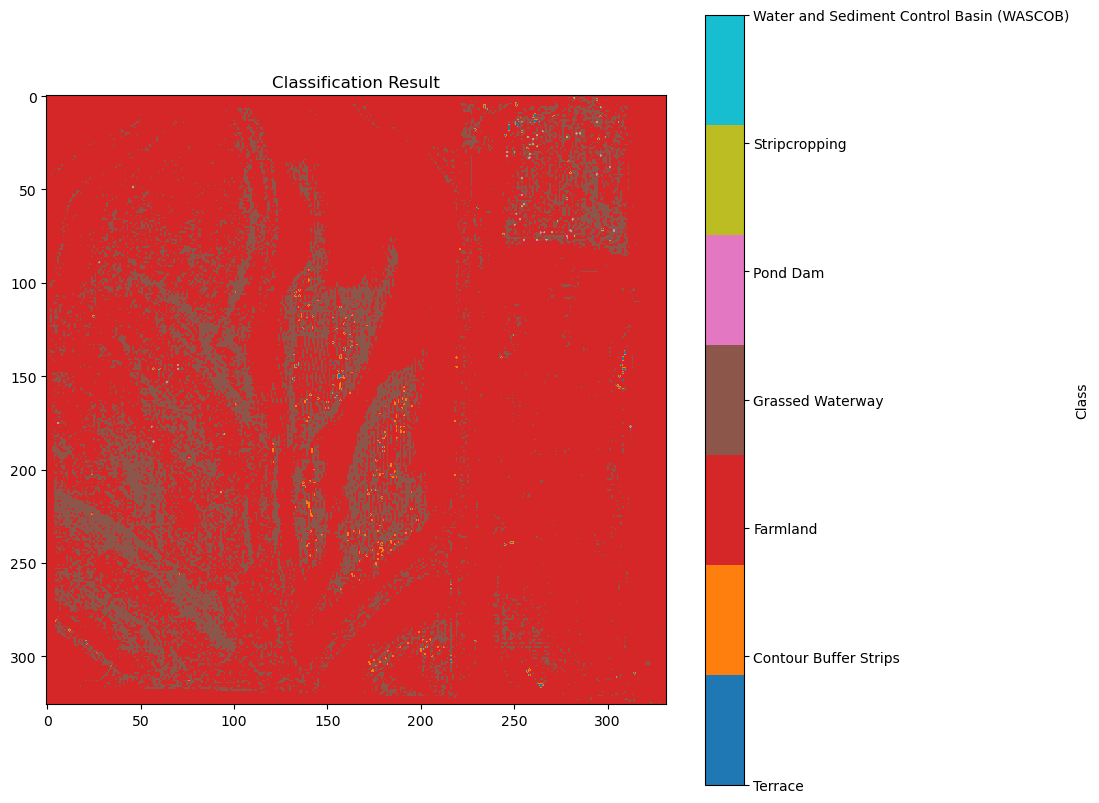

In [57]:
# Plot using tab10 colormap for discrete colors
tab10_custom = plt.get_cmap('tab10', 7)

# Plot using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(classified_labels_numeric, cmap=tab10_custom, vmin=1, vmax=7)  # Specify vmin and vmax to ensure correct mapping
cbar = plt.colorbar(ticks=range(1, 8), label='Class')  # Specify ticks for discrete classes
cbar.ax.set_yticklabels(class_mapping.keys())  # Set custom tick labels for the colorbar
plt.title('Classification Result')
plt.show()

In [58]:
# #Hyperparameter tuning - might take a while!

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'forest__n_estimators':[100, 200, 300],
#     'forest__max_depth':[None, 10, 20]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(xargs_train, yargs_train)

# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Predict on the test set using the best estimator
# y_pred = best_estimator.predict(xargs_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(yargs_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(yargs_test, y_pred))

In [59]:
#Georgia NAIP example

'''
NAIP 4-band image band designations (downloaded from USGS EarthExplorer):

Band 1: red
Band 2: green
Band 3: blue
Band 4: nir

'''

xx = rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130.tif")

print('bands: ' + str(xx.count))
print('height: ' + str(xx.height))
print('width: ' + str(xx.width))
print('crs: ' + str(xx.crs))



bands: 4
height: 12290
width: 10620
crs: EPSG:26917


In [60]:
##Add NDVI and NDWI
# Open the existing GeoTIFF file in read mode
with rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130.tif") as src:
    # Read the red and near-infrared bands
    red_band = src.read(1)  
    green_band = src.read(2)  
    blue_band = src.read(3)  
    nir_band = src.read(4)  

    # Calculate NDVI -- SOME INF VALUES, BELOW IS HOW TO DEAL WITH THEM?
    ndvi = np.where((nir_band + red_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
    ndwi = np.where((green_band + nir_band) == 0, 0, (green_band - nir_band) / (green_band + nir_band))

    # Get metadata from the source file
    kwargs = src.meta

    # Update metadata for the new band
    kwargs.update(
        count=len(src.indexes) + 2,  # Increment band count
        dtype=rasterio.float32  # Specify data type (float32 for NDVI and NDWI)
    )

    # Open a new GeoTIFF file in write mode
    with rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130_with_ndvi8.tif", "w", **kwargs) as dst:
        # Write the existing bands to the new file
        for i in range(1, len(src.indexes) + 1):
            dst.write(src.read(i), i)

        # Write the NDVI band to the new file
        dst.write(ndvi.astype(rasterio.float32), len(src.indexes) + 1)

C:\Users\arj26323\AppData\Local\Temp\ipykernel_13024\2399842734.py:11: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.where((nir_band + red_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
C:\Users\arj26323\AppData\Local\Temp\ipykernel_13024\2399842734.py:11: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((nir_band + red_band) == 0, 0, (nir_band - red_band) / (nir_band + red_band))
C:\Users\arj26323\AppData\Local\Temp\ipykernel_13024\2399842734.py:12: RuntimeWarning: divide by zero encountered in divide
  ndwi = np.where((green_band + nir_band) == 0, 0, (green_band - nir_band) / (green_band + nir_band))
C:\Users\arj26323\AppData\Local\Temp\ipykernel_13024\2399842734.py:12: RuntimeWarning: invalid value encountered in divide
  ndwi = np.where((green_band + nir_band) == 0, 0, (green_band - nir_band) / (green_band + nir_band))


In [61]:
##Divide by zero errors
print('bands: ' + str(dst.count))
print('height: ' + str(dst.height))
print('width: ' + str(dst.width))
print('crs: ' + str(dst.crs))

im2 = rasterio.open("F:/Iowa BMP/Geotiffs/GA/Tests/m_3108101_se_17_060_20220130_with_ndvi8.tif", "r")

dst_whole = np.column_stack((im2.read(3).ravel(), im2.read(2).ravel(), im2.read(1).ravel(), im2.read(4).ravel(), \
                           im2.read(5).ravel(), im2.read(6).ravel())) ##NOTE BAND DIFFERENCES

classified_dst = pipe.predict(dst_whole)
classified_dst_reshaped = classified_dst.reshape(im2.read(1).shape)

class_mapping = {
    'Terrace': 1,
    'Contour Buffer Strips': 2, 
    'Farmland': 3,
    'Grassed Waterway': 4, 
    'Pond Dam': 5, 
    'Stripcropping': 6,
    'Water and Sediment Control Basin (WASCOB)': 7
}

classified_dst_numeric = np.vectorize(class_mapping.get)(classified_dst_reshaped)

bands: 6
height: 12290
width: 10620
crs: EPSG:26917


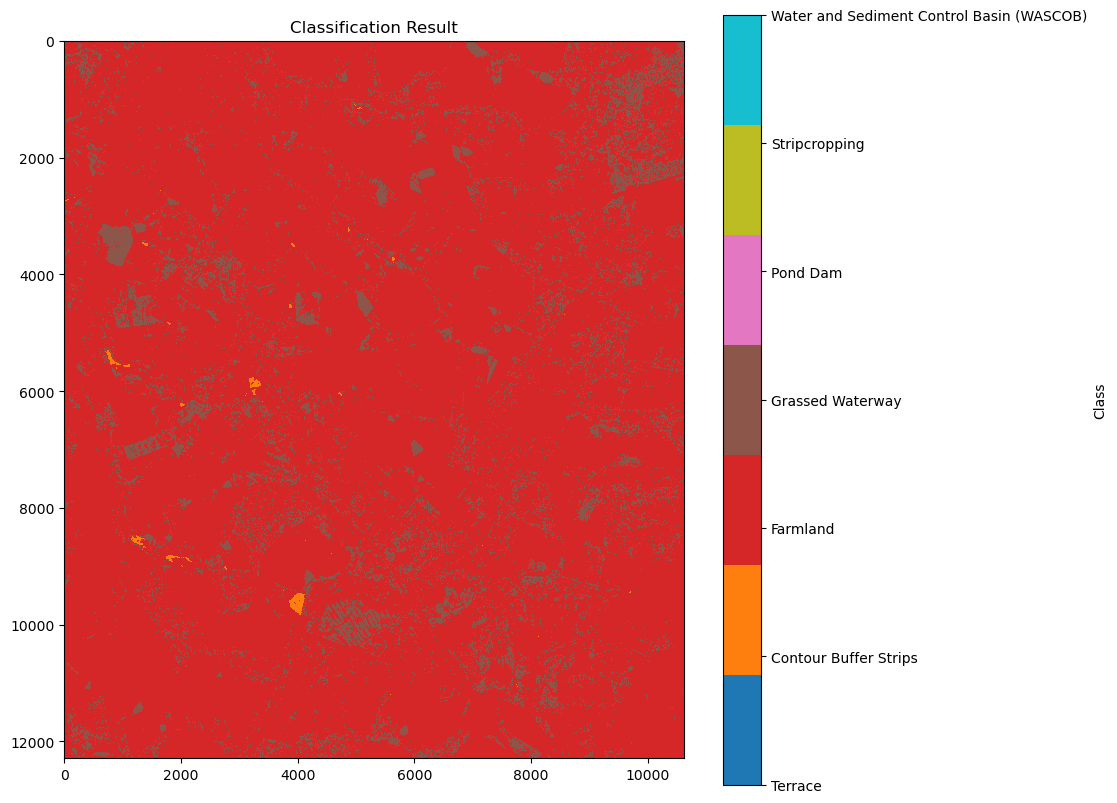

In [62]:
# Plot using tab10 colormap for discrete colors
tab10_custom = plt.get_cmap('tab10', 7)

# Plot using the custom colormap
plt.figure(figsize=(10, 10))
plt.imshow(classified_dst_numeric, cmap=tab10_custom, vmin=1, vmax=7)  # Specify vmin and vmax to ensure correct mapping
cbar = plt.colorbar(ticks=range(1, 8), label='Class')  # Specify ticks for discrete classes
cbar.ax.set_yticklabels(class_mapping.keys())  # Set custom tick labels for the colorbar
plt.title('Classification Result')
plt.show()

In [ ]:
'''
Ideas to improve BMP classification:

Weighted Loss Function: Adjust the loss function to penalize misclassifications of the minority class more heavily, 
effectively giving it more importance during training.

Adjusting Class Weights: In some machine learning algorithms (such as Random Forest), 
you can specify class weights to give more importance to minority classes during training.

A possible approach could be to allocate a larger proportion of the training dataset to BMPs while still 
including enough samples of general farmland to maintain the overall class distribution. Experiment with different 
ratios and evaluate the model performance using appropriate metrics such as precision, recall, and F1-score to find the
optimal balance between class representation and classification accuracy for your specific use case. 
Cross-validation techniques can also help assess the robustness of your model across different subsets of the data.

How to detect BMPs as opposed to just row crops, fields, etc.?
'''